### Pivot and PivotTable in Pandas

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [3]:
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [4]:
df.pivot(index="foo",columns="bar")

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [5]:
df_pivoted = df.pivot(index="foo",columns="bar",values="baz")

In [6]:
grand_total = df_pivoted['A'] + df_pivoted['B'] + df_pivoted['C']
grand_total

foo
one     6
two    15
dtype: int64

In [14]:
df_salesData = pd.read_excel("supermarket_sales.xlsx")

In [15]:
df_salesData

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [18]:
male_female = df_salesData.groupby("Gender")

In [21]:
male_female.sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Gender,,,,,,,,
Female,27687.24,2869,7994.425,167882.925,159888.50,2385.714286,7994.425,3489.2
Male,27984.89,2641,7384.944,155083.824,147698.88,2376.190476,7384.944,3483.5


In [23]:
df_salesData['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [24]:
df_salesData.pivot_table(index="Gender",aggfunc="sum")

,Quantity,Rating,Tax 5%,Total,Unit price,cogs,gross income,gross margin percentage
Gender,,,,,,,,
Female,2869,3489.2,7994.425,167882.925,27687.24,159888.50,7994.425,2385.714286
Male,2641,3483.5,7384.944,155083.824,27984.89,147698.88,7384.944,2376.190476


In [26]:
## qty sold by male vs female customers
df_salesData.pivot_table(index="Gender",
                         values=["Quantity","cogs","Total"],
                         aggfunc="sum")

,Quantity,Total,cogs
Gender,,,
Female,2869,167882.925,159888.50
Male,2641,155083.824,147698.88


In [29]:
## in average male and female rating is the same
round(df_salesData.pivot_table(index="Gender",
                         values=["Unit price","Rating"],
                         aggfunc="mean"),2)

,Rating,Unit price
Gender,,
Female,6.96,55.26
Male,6.98,56.08


In [31]:
## showing qty sold and total spending by product line
productline_spending = df_salesData.pivot_table(index="Gender",
                         columns="Product line",
                         values=["Quantity","Total"],
                         aggfunc="sum")
productline_spending

Quantity                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
Gender                                                                       
Female                          488                 530                514   
Male                            483                 372                438   

                                                                     \
Product line Health and beauty Home and lifestyle Sports and travel   
Gender                                                                
Female                     343                498               496   
Male                       511                413               424   

                              Total                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
Gender                                                                       
Female                   27102.0225           30437.400         33170.9175   
Male                     27235.5090           23868.495         22973.9265   

                                                                     
Product line Health and beauty Home and lifestyle Sports and travel  
Gender                                                               
Female              18560.9865         30036.8775        28574.7210  
Male                30632.7525         23825.0355        26548.1055

In [33]:
tax_spending_by_city = df_salesData.pivot_table(index="Gender",
                         columns="City",
                         values=["Tax 5%","Total"],
                         aggfunc="sum")
tax_spending_by_city

Tax 5%                            Total                        
City    Mandalay  Naypyitaw     Yangon   Mandalay   Naypyitaw      Yangon
Gender                                                                   
Female  2520.395  2937.4030  2536.6270  52928.295  61685.4630  53269.1670
Male    2536.637  2327.7735  2520.5335  53269.377  48883.2435  52931.2035

In [48]:
populationData = pd.read_csv("population_total.csv",sep=",")

In [49]:
populationData

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [50]:
populationData.dropna(inplace=True)

In [51]:
populationData

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [58]:
df_reshaped = populationData.pivot(index="year",columns="country",values="population")

In [60]:
df_reshaped.head(n=10)

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1955.0,8270991.0,1419994.0,9774283.0,19754.0,9232.0,5043247.0,5783.0,49648.0,18789418.0,1563507.0,...,2372559.0,7277333.0,54921.0,6744695.0,28147443.0,7669.0,21147.0,4965574.0,2644976.0,3213286.0
1960.0,8996973.0,1636090.0,11057863.0,20123.0,13411.0,5454933.0,6032.0,54131.0,20481779.0,1874121.0,...,2538643.0,8526300.0,63689.0,8141841.0,32670039.0,8157.0,32761.0,5315355.0,3070776.0,3776681.0
1965.0,9956320.0,1896171.0,12550885.0,23672.0,18549.0,5770570.0,6361.0,58698.0,22159650.0,2211319.0,...,2694536.0,10116870.0,74270.0,9692278.0,37858951.0,8724.0,50970.0,5727751.0,3570464.0,4471177.0
1970.0,11173642.0,2150707.0,14464985.0,27363.0,24276.0,5890365.0,6771.0,64177.0,23880561.0,2525068.0,...,2809793.0,12080317.0,85377.0,11396393.0,43404793.0,8853.0,76874.0,6193384.0,4179067.0,5289303.0
1975.0,12689160.0,2411732.0,16607707.0,30052.0,30705.0,7024000.0,7159.0,62675.0,25865776.0,2832759.0,...,2830176.0,13857478.0,99859.0,13189509.0,48718189.0,9320.0,74954.0,6784695.0,4943283.0,6293875.0
1980.0,13356511.0,2682690.0,19221665.0,32646.0,36067.0,8341289.0,7285.0,61865.0,27896528.0,3099754.0,...,2915389.0,15898757.0,115597.0,15182611.0,54281846.0,11231.0,150877.0,7941898.0,5851825.0,7408624.0
1985.0,11938208.0,2969672.0,22431502.0,39519.0,44600.0,9961997.0,7293.0,61786.0,30216279.0,3335940.0,...,3011519.0,18061284.0,129984.0,17319520.0,60896721.0,13622.0,182421.0,9572175.0,6923149.0,8877489.0
1990.0,12412308.0,3286073.0,25758869.0,47347.0,54509.0,11848386.0,8899.0,62528.0,32618651.0,3538171.0,...,3109601.0,20398348.0,146573.0,19632665.0,67988862.0,13800.0,217258.0,11709993.0,8036845.0,10432421.0
1995.0,18110657.0,3112936.0,28757785.0,53161.0,63850.0,13945206.0,9866.0,68670.0,34828170.0,3217348.0,...,3224281.0,22791026.0,168158.0,21931084.0,74910461.0,14149.0,255634.0,14913315.0,9096607.0,11410714.0


In [62]:
df_selected_country = df_reshaped[["United States","Russia", "Brazil","China","Canada","Nigeria"]]
df_selected_country

country,United States,Russia,Brazil,China,Canada,Nigeria
year,,,,,,
1955.0,171685336.0,111355300.0,62533919.0,6.122416e+08,15673763.0,41086100.0
1960.0,186720571.0,119871700.0,72179226.0,6.604081e+08,17847405.0,45138458.0
1965.0,199733676.0,126503736.0,83373530.0,7.242190e+08,19627980.0,50127921.0
1970.0,209513341.0,130148653.0,95113265.0,8.276014e+08,21374326.0,55982144.0
1975.0,219081251.0,133804858.0,107216205.0,9.262409e+08,23059265.0,63374298.0
1980.0,229476354.0,138053150.0,120694009.0,1.000089e+09,24416886.0,73423633.0
1985.0,240499825.0,142957284.0,135274080.0,1.075589e+09,25744810.0,83562785.0
1990.0,252120309.0,147531561.0,149003223.0,1.176884e+09,27541319.0,95212450.0
1995.0,265163745.0,148227466.0,162019896.0,1.240921e+09,29164152.0,107948335.0


In [64]:
df_selected_country = df_selected_country.astype(int)

In [66]:
df_selected_country.index

Float64Index([1955.0, 1960.0, 1965.0, 1970.0, 1975.0, 1980.0, 1985.0, 1990.0,
              1995.0, 2000.0, 2005.0, 2010.0, 2015.0, 2016.0, 2017.0, 2018.0,
              2019.0, 2020.0],
             dtype='float64', name='year')

### Lineplot

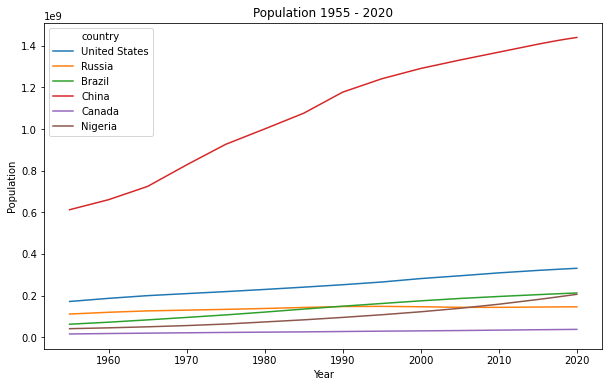

In [118]:
df_selected_country.plot(kind="line",
                         xlabel="Year",
                         ylabel="Population",
                         title="Population 1955 - 2020",
                        figsize=(10,6))
plt.savefig("barchart_population.png")

### Area Plot

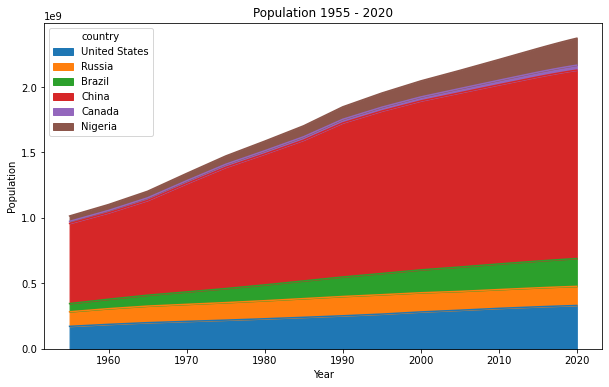

In [120]:
df_selected_country.plot(kind="area",
                         xlabel="Year",
                         ylabel="Population",
                         title="Population 1955 - 2020",
                        figsize=(10,6))
plt.show()

### Bar chart

In [102]:
##grab index row of 2020 and transpose the DataFrame to make a barplot
barplot = df_selected_country[df_selected_country.index.isin([2020])]
barplot = barplot.T

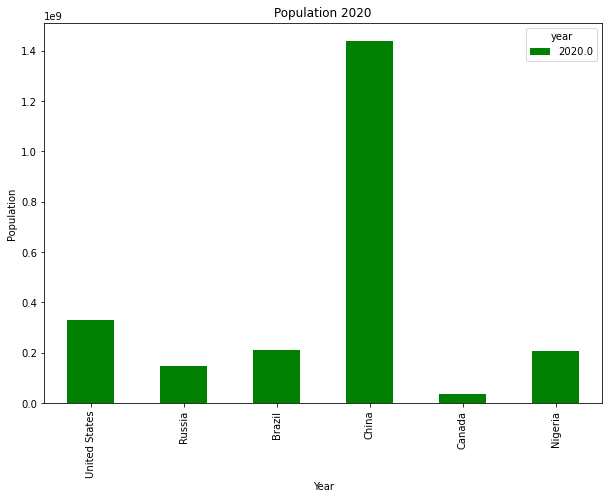

In [117]:
barplot.plot(kind="bar",
             xlabel="Year",
             ylabel="Population",
             title="Population 2020",
             color="green",
             figsize=(10,7))
plt.savefig("barchart_population.png")


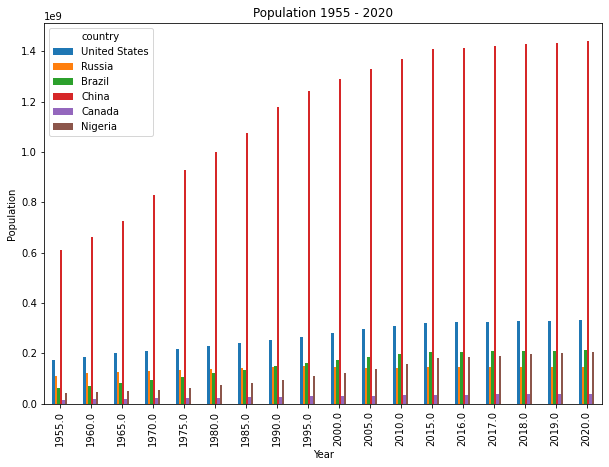

In [119]:
df_selected_country.plot(kind="bar",
             xlabel="Year",
             ylabel="Population",
             title="Population 1955 - 2020",
             figsize=(10,7))
plt.show()

In [96]:
barplot_5yrs = df_selected_country[df_selected_country.index.isin([2016,2017,2018,2019,2020])]
barplot_5yrs

country,United States,Russia,Brazil,China,Canada,Nigeria
year,,,,,,
2016.0,323015995,145275383,206163053,1414049351,36382944,185960241
2017.0,325084756,145530082,207833823,1421021791,36732095,190873244
2018.0,327096265,145734038,209469323,1427647786,37074562,195874683
2019.0,329064917,145872256,211049527,1433783686,37411047,200963599
2020.0,331002651,145934462,212559417,1439323776,37742154,206139589


In [100]:
##transpose the dataframe before making a bar plot so as to use column data as index
barplot_5yrs = barplot_5yrs.T

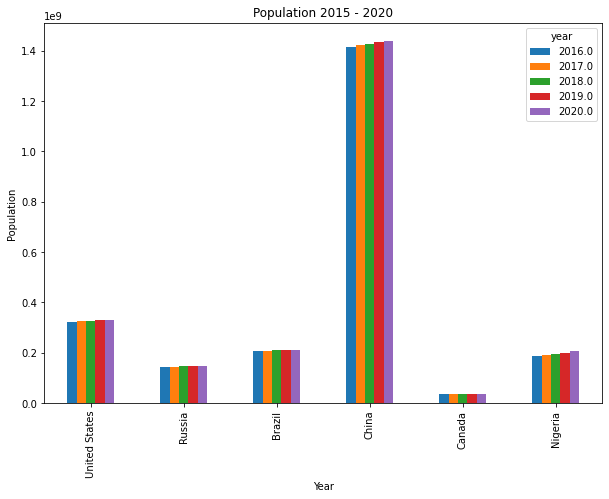

In [116]:
barplot_5yrs.plot(kind="bar",
             xlabel="Year",
             ylabel="Population",
             title="Population 2015 - 2020",
             figsize=(10,7))
plt.savefig("5yrs_population.png")

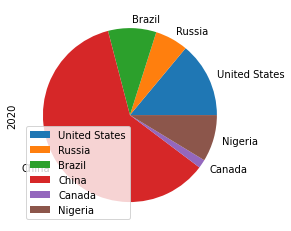

In [115]:
##rename the init column name to a str 
pieChart = barplot.rename(columns={2020:"2020"})
pieChart.plot(kind="pie",subplots=True)
plt.savefig("PieChart_population.png")